# Risk Prediction
## Análise exploratória dos dados de clientes de Cartão de crédito

Dados: https://archive-beta.ics.uci.edu/ml/datasets/default+of+credit+card+clients

O objetivo deste notebook é explorar os dados, criar visualizações que facilitem o entendimento e analisar as informações do link acima com a finalidade de um melhor entendimento.

Sumario:

1. Descrição dos dados
2. Perguntas de partida e hipoteses
3. Insights

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, Markdown, Latex, HTML
#!poetry add xlrd

In [5]:
df = pd.read_excel("../data/raw/data.xls", header=1)
# df.to_csv('data.csv', index=False, header=False)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1. Descrição dos dados

In [4]:
display(Markdown("- Quantidade de Instâncias: " + str(df.shape[0])))
display(Markdown("- Quantidade de Atributos: " + str(df.shape[1])))
display(Markdown("- Variaveis e Seus Tipos:"))
display(df.dtypes)
display(Markdown("- Quantidade de Valores Faltantes:"))
display(df.isnull().sum())

- Quantidade de Instâncias: 30000

- Quantidade de Atributos: 25

- Variaveis e Seus Tipos:

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

- Quantidade de Valores Faltantes:

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- Vemos que todas as variaveis possuem as 30000 e que não foi encontrado valores faltantes assim nao sendo necessario imputação 
- É tambem notado que existe a coluna pay_0 mas falta a coluna pay_1 
- Como solução renomear pay_0 para pay_1 para ficar de acordo com BILL_AMT1 e PAY_AMT1
- Vemos tambem que todas variaveis estao como tipo inteiro porem SEX, EDUCATION, AGE, PAY_1 ... PAY_6 e default payment next month percebemos que são categoricas(nominais) sendo necessario trata-las.

In [6]:
display(Markdown(" SEX "  + str(sorted(df['SEX'].unique()))))
display(Markdown(" EDUCATION " + str(sorted(df['EDUCATION'].unique()))))
display(Markdown(" MARRIAGE " + str(sorted(df['MARRIAGE'].unique()))))
display(Markdown(" PAY_0 " + str(sorted(df['PAY_0'].unique()))))
display(Markdown(" default payment next month " + str(sorted(df['default payment next month'].unique()))))

 SEX [1, 2]

 EDUCATION [0, 1, 2, 3, 4, 5, 6]

 MARRIAGE [0, 1, 2, 3]

 PAY_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]

 default payment next month [0, 1]

- Verificando as variaveis categoricas(nominais) percebemos que alguns valores não possuiam significado de acordo com a documentação original como EDUCATION: 0,5,6; MARRIAGE: 0; PAY_0: -2,0;
- Houve algumas duvidas na compreensão de certas variaveis do dataset por apresentar algumas discrepâncias. Porem o [tópico de discussão](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608?sort=votes) para este dataset nos ajudou a entender melhor esses dados


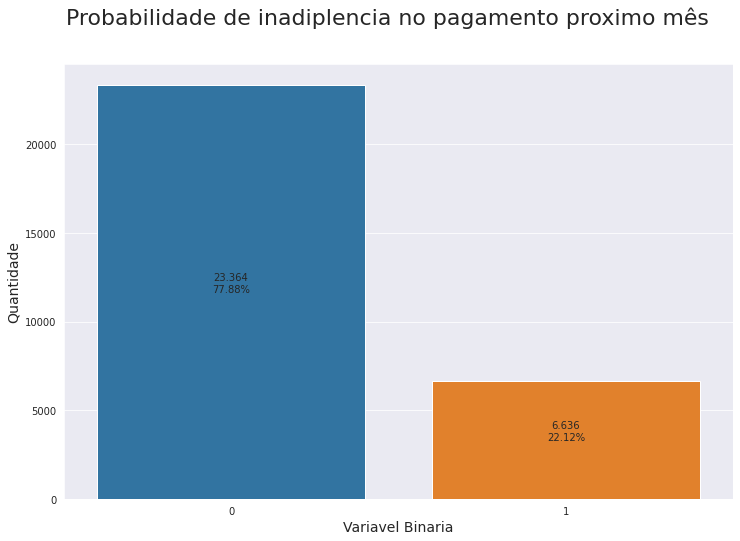

In [9]:
# ver quant de default payment next month em porcentagem
ax = sns.countplot( data=df, x='default payment next month')
ax.figure.set_size_inches(12, 8)
total = float(len(df))
for p in ax.patches:
    valores = "{0}\n{1:.2f}%".format(f'{p.get_height():_.2f}'.replace('.',',').replace('_','.')[:-3],100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()/2
    ax.annotate(valores, (x, y),ha='center')
plt.suptitle('Probabilidade de inadiplencia no pagamento proximo mês', fontsize=22)
plt.ylabel('Quantidade', size=14)
plt.xlabel('Variavel Binaria', size=14)
plt.show()

- Percebemos atraves do grafico sobre a variavel 'default payment next month' que o dados não balanceado

## 2. Perguntas de partida e hipóteses

1. Há indícios de que existe uma correlação entre o valor do crédito concedido e o risco de inadiplência?
2. Há indícios de que existe uma correlação entre o gênero do indivíduo e o risco de inadiplência?
3. Há indícios de que existe uma correlação entre o grau de escolaridade do indivíduo e o risco de inadiplência?
4. Há indícios de que existe uma correlação entre o estado civil do indivíduo e o risco de inadiplência?
5. Há indícios de que existe uma correlação entre a idade do indivíduo e o risco de inadiplência?
6. Há indícios de que existe uma correlação entre o status de pagamentos anteriores e o risco de inadiplência?
7. Há indícios de que existe uma correlação entre os saldos bancários anteriores e o risco de inadiplência?
8. Há indícios de que existe uma correlação entre o valor de pagamentos anteriores e o risco de inadiplência?

## 3. Insights

1. Os dados dão indícios de que existe uma correlação positiva entre o valor do crédito concedido e a inadiplência

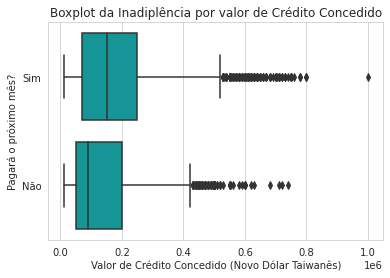

In [42]:
sns.set_style("whitegrid")

ax = sns.boxplot(data=df, x="LIMIT_BAL", y="default payment next month", orient="h", color="#00AAAA")

ax.set_yticklabels(["Sim","Não"])

plt.title("Boxplot da Inadiplência por valor de Crédito Concedido")
plt.xlabel("Valor de Crédito Concedido (Novo Dólar Taiwanês)")
plt.ylabel("Pagará o próximo mês?")

display(Markdown("1. Os dados dão indícios de que existe uma correlação positiva entre o valor do crédito concedido e a inadiplência"))


2. Os dados dão indícios de que existe uma correlação entre o gênero do indivíduo e a inadiplência

 - Os indivíduos do sexo Masculino têm, proporcionalmente, maior probabilidade de inadiplência

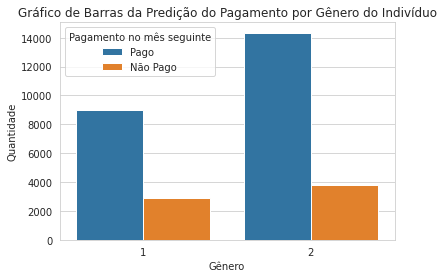

In [40]:
# plt.figure(figsize=(3,5))

sns.countplot(data=df, x="SEX", hue="default payment next month")

plt.legend(["Pago","Não Pago"], title="Pagamento no mês seguinte")

plt.title("Gráfico de Barras da Predição do Pagamento por Gênero do Indivíduo")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")

display(Markdown("2. Os dados dão indícios de que existe uma correlação entre o gênero do indivíduo e a inadiplência"))
display(Markdown(" - Os indivíduos do sexo Masculino têm, proporcionalmente, maior probabilidade de inadiplência"))

3. Os dados dão indícios de que existe uma correlação entre a escolaridade do indivíduo e a inadiplência

 - A ordem decrescente de probabilidade de inadiplência é: Indivíduos que possuem o Ensino Médio Completo, Graduados, Pós-Graduados

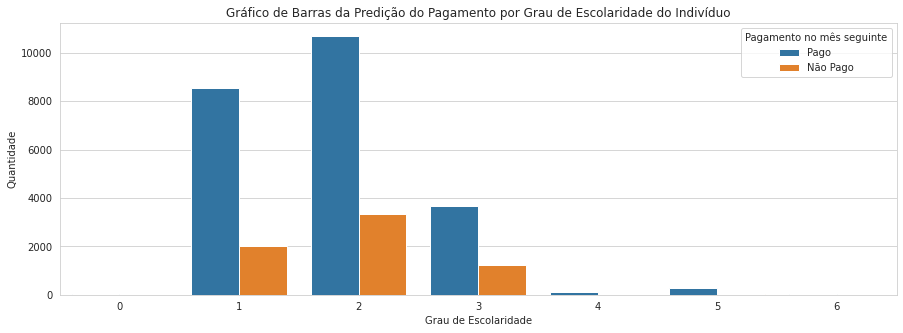

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x="EDUCATION", hue="default payment next month")


plt.legend(["Pago","Não Pago"], title="Pagamento no mês seguinte")

plt.title("Gráfico de Barras da Predição do Pagamento por Grau de Escolaridade do Indivíduo")
plt.xlabel("Grau de Escolaridade")
plt.ylabel("Quantidade")

display(Markdown("3. Os dados dão indícios de que existe uma correlação entre a escolaridade do indivíduo e a inadiplência"))
display(Markdown(" - A ordem decrescente de probabilidade de inadiplência é: Indivíduos que possuem o Ensino Médio Completo, Graduados, Pós-Graduados"))

4. Os dados dão indícios de que existe uma correlação entre o estado civil do indivíduo e a inadiplência

 - Os indivíduos casados têm, proporcionalmente, maior probabilidade de inadiplência

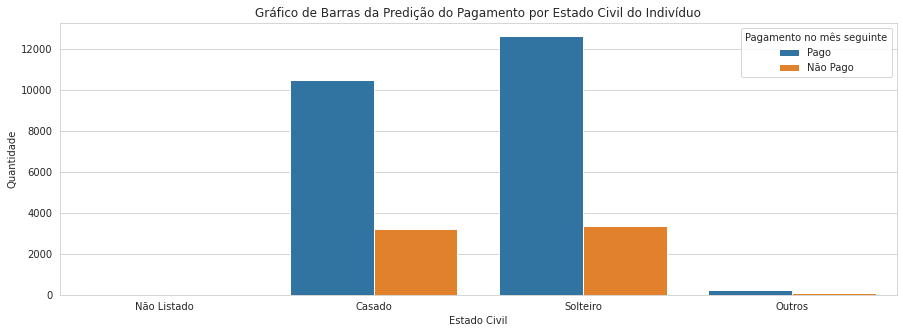

In [43]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x="MARRIAGE", hue="default payment next month")

ax.set_xticklabels(["Não Listado","Casado","Solteiro","Outros"])
plt.legend(["Pago","Não Pago"], title="Pagamento no mês seguinte")

plt.title("Gráfico de Barras da Predição do Pagamento por Estado Civil do Indivíduo")
plt.xlabel("Estado Civil")
plt.ylabel("Quantidade")

display(Markdown("4. Os dados dão indícios de que existe uma correlação entre o estado civil do indivíduo e a inadiplência"))
display(Markdown(" - Os indivíduos casados têm, proporcionalmente, maior probabilidade de inadiplência"))

In [28]:
# help(plt.legend)

5. Não há indícios de que existe uma correlação entre a idade do indivíduo e a inadiplência

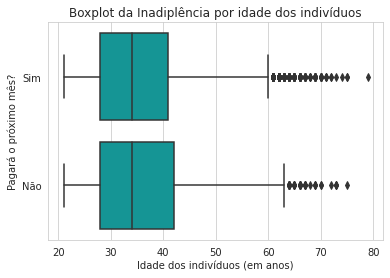

In [41]:
ax = sns.boxplot(data=df, x="AGE", y="default payment next month", orient="h", color="#00AAAA")

ax.set_yticklabels(["Sim","Não"])

plt.title("Boxplot da Inadiplência por idade dos indivíduos")
plt.xlabel("Idade dos indivíduos (em anos)")
plt.ylabel("Pagará o próximo mês?")

display(Markdown("5. Não há indícios de que existe uma correlação entre a idade do indivíduo e a inadiplência"))

6. Os dados dão indícios de que existe uma correlação entre o status de pagamentos anteriores e a inadiplência

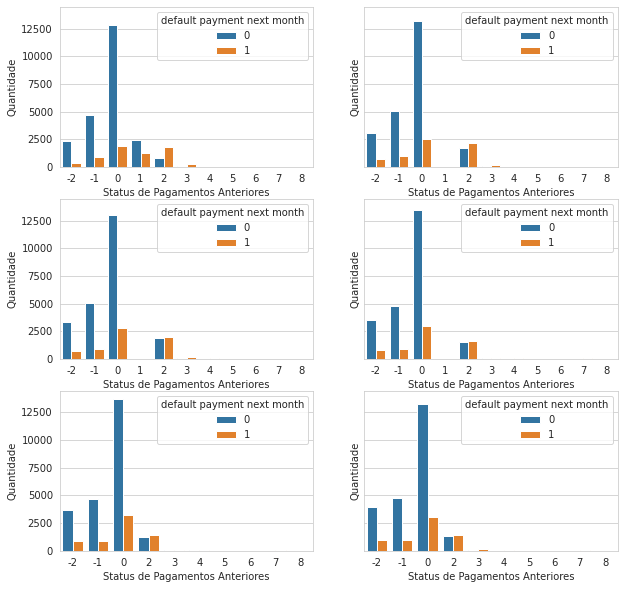

In [59]:
fig, axes = plt.subplots(3, 2, figsize=(10,10), sharey=True)
sns.countplot(ax=axes[0,0], data=df, x="PAY_0", hue="default payment next month")
sns.countplot(ax=axes[0,1], data=df, x="PAY_2", hue="default payment next month")
sns.countplot(ax=axes[1,0], data=df, x="PAY_3", hue="default payment next month")
sns.countplot(ax=axes[1,1], data=df, x="PAY_4", hue="default payment next month")
sns.countplot(ax=axes[2,0], data=df, x="PAY_5", hue="default payment next month")
sns.countplot(ax=axes[2,1], data=df, x="PAY_6", hue="default payment next month")

for l in range(3):
    for c in range(2):
        axes[l][c].set_ylabel("Quantidade")
        axes[l][c].set_xlabel("Status de Pagamentos Anteriores")
    

display(Markdown("6. Os dados dão indícios de que existe uma correlação entre o status de pagamentos anteriores e a inadiplência"))

7. Não há indícios de que existe uma correlação entre os saldos bancários anteriores e a inadiplência

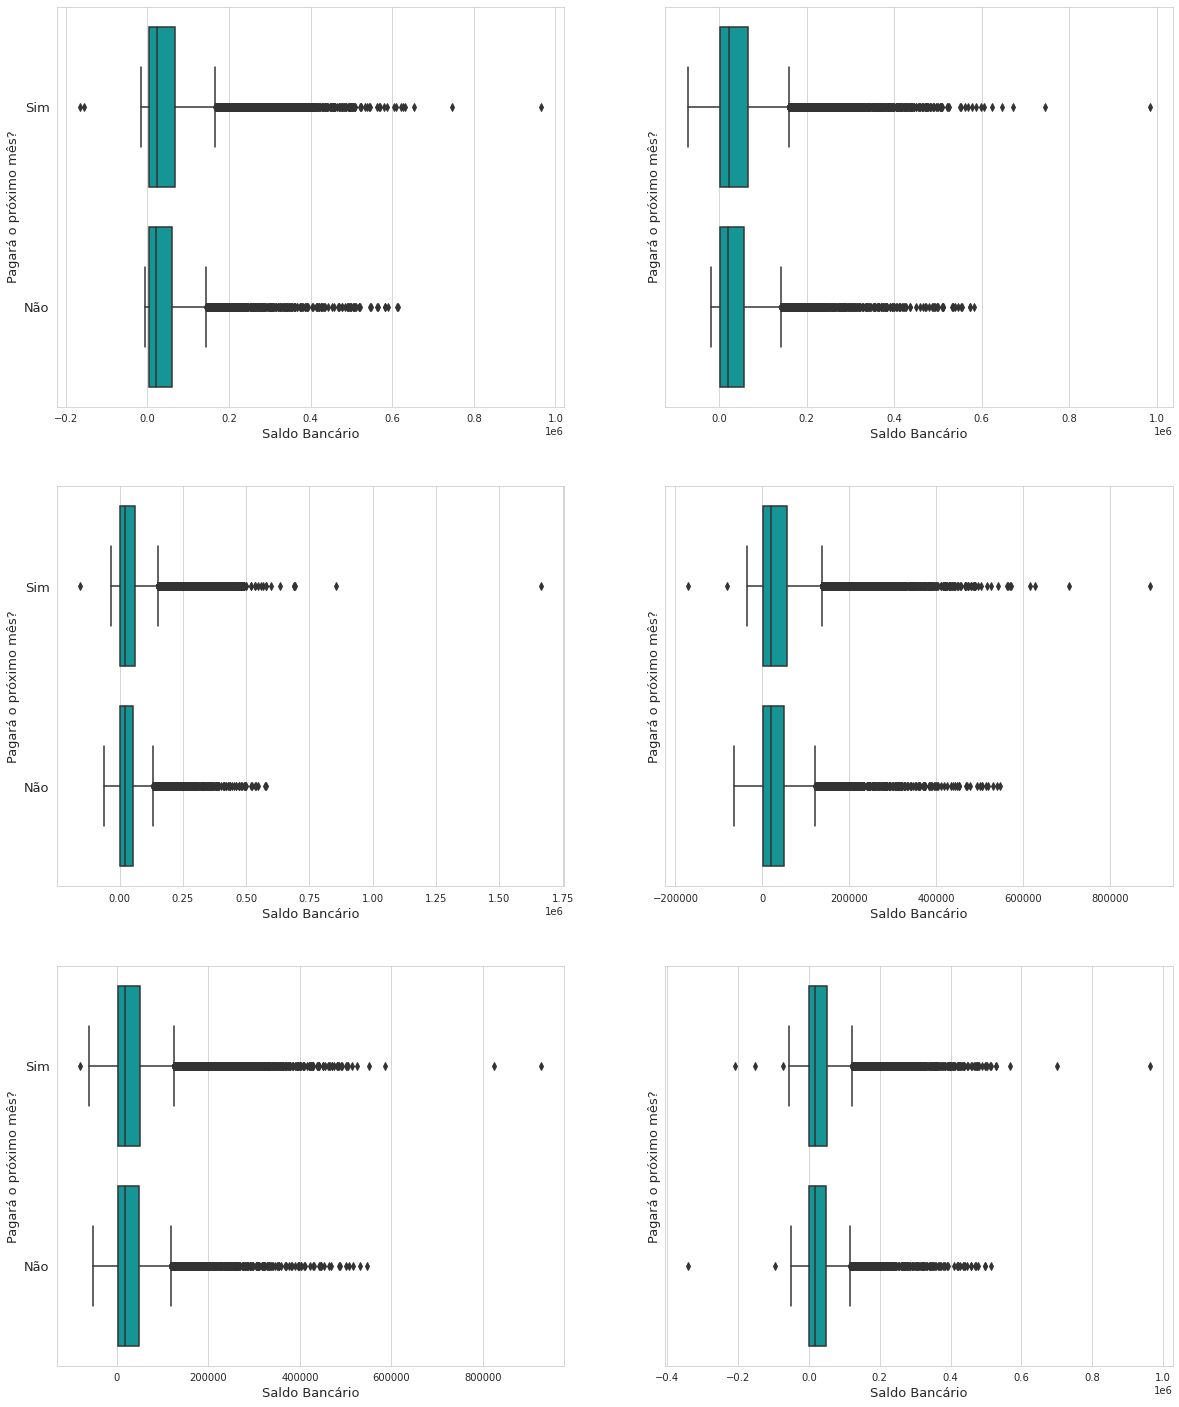

In [61]:
fig, axes = plt.subplots(3, 2, figsize=(20,25), sharey=True)
sns.boxplot(ax=axes[0,0], data=df, x="BILL_AMT1", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[0,1], data=df, x="BILL_AMT2", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,0], data=df, x="BILL_AMT3", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[1,1], data=df, x="BILL_AMT4", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,0], data=df, x="BILL_AMT5", y="default payment next month", orient="h", color="#00AAAA")
sns.boxplot(ax=axes[2,1], data=df, x="BILL_AMT6", y="default payment next month", orient="h", color="#00AAAA")

for l in range(3):
    for c in range(2):
        axes[l][c].set_yticklabels(["Sim","Não"], size=13)
        axes[l][c].set_ylabel("Pagará o próximo mês?", size=13)
        axes[l][c].set_xlabel("Saldo Bancário", size=13)

display(Markdown("7. Não há indícios de que existe uma correlação entre os saldos bancários anteriores e a inadiplência"))

In [29]:
# help(sns.boxplot)

8. Não há indícios suficientes de que exista uma correlação entre o valor de pagamentos anteriores e a inadiplência

 - Para esta análise os outliers foram descartados

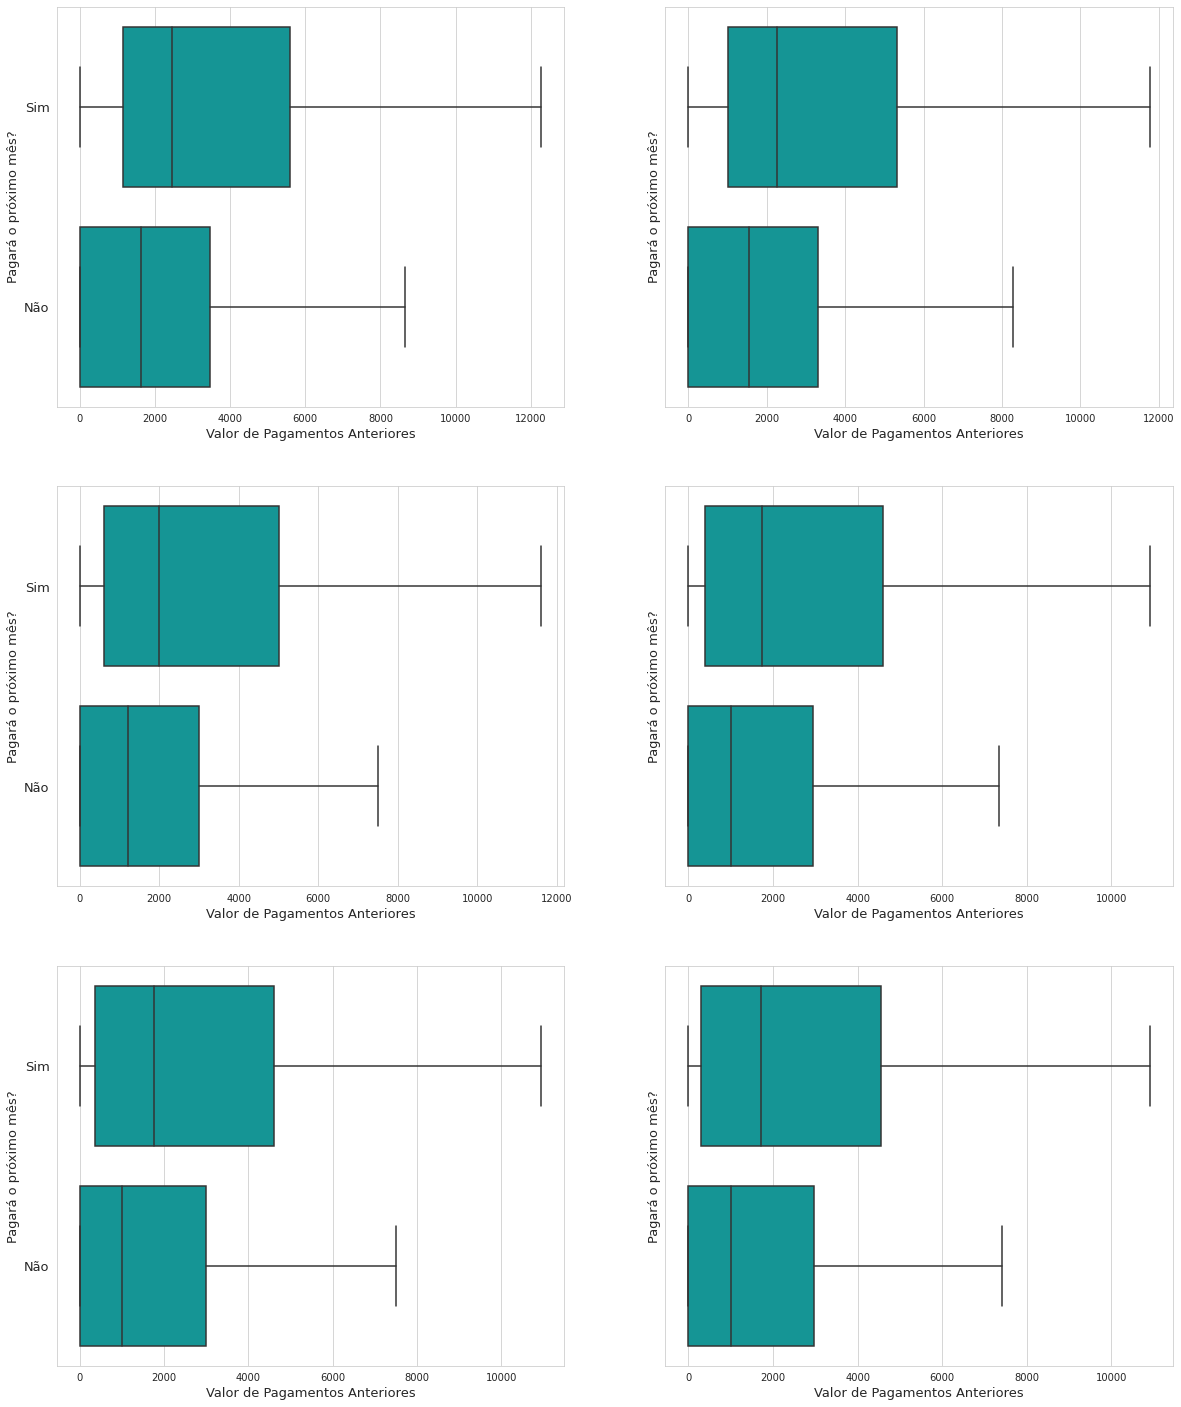

In [63]:
fig, axes = plt.subplots(3, 2, figsize=(20,25), sharey=True)
sns.boxplot(ax=axes[0,0], data=df, x="PAY_AMT1", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)
sns.boxplot(ax=axes[0,1], data=df, x="PAY_AMT2", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)
sns.boxplot(ax=axes[1,0], data=df, x="PAY_AMT3", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)
sns.boxplot(ax=axes[1,1], data=df, x="PAY_AMT4", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)
sns.boxplot(ax=axes[2,0], data=df, x="PAY_AMT5", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)
sns.boxplot(ax=axes[2,1], data=df, x="PAY_AMT6", y="default payment next month", orient="h", color="#00AAAA", showfliers=False)

for l in range(3):
    for c in range(2):
        axes[l][c].set_yticklabels(["Sim","Não"], size=13)
        axes[l][c].set_ylabel("Pagará o próximo mês?", size=13)
        axes[l][c].set_xlabel("Valor de Pagamentos Anteriores", size=13)

display(Markdown("8. Não há indícios suficientes de que exista uma correlação entre o valor de pagamentos anteriores e a inadiplência"))
display(Markdown(" - Para esta análise os outliers foram descartados"))